# I. EXERCICES N°01

# I.1. Importation des packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

# I.2. Lecture et affichage du fichier

In [3]:
data = pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.shape

(30, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# I.3. Division des données

In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# I.4. Entrainement du modèle et évaluation du modèle

In [10]:
modele_linear  = LinearRegression()

In [11]:
modele_linear.fit(X_train, y_train)

LinearRegression()

In [12]:
y_test

2     37731.0
16    66029.0
19    93940.0
14    61111.0
15    67938.0
13    57081.0
Name: Salary, dtype: float64

In [13]:
prediction = modele_linear.predict(X_test)
prediction

array([41434.13316677, 74801.31604849, 83143.11176892, 69240.11890153,
       72947.58366617, 65532.6541369 ])

In [14]:
print("Mean Squared error:", mean_squared_error(y_test, prediction))
print("r2_score:",r2_score(y_test, prediction))

Mean Squared error: 61641413.308879755
r2_score: 0.7775083459037235


In [15]:
modele_linear.score(X_test, y_test)

0.7775083459037235

# I.5. Affichage de la ligne de régression

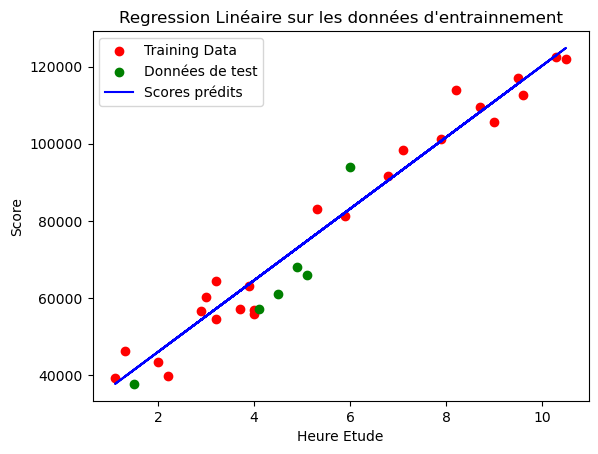

In [16]:
plt.scatter(X_train, y_train, c='r', label = "Training Data") 
plt.scatter(X_test, y_test, color ='green', label="Données de test")
plt.plot(X_train, modele_linear.predict(X_train), color='b', label ="Scores prédits")
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.title("Regression Linéaire sur les données d'entrainnement")
plt.legend()
plt.show()

# II. EXERCICES N°02

# II.1. lecture du fichier et analyse des données

In [17]:
data = pd.read_csv('USA_Housing.csv')

In [18]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [20]:
data.shape

(5000, 7)

In [21]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [22]:
data.drop(['Address'], axis = 1, inplace =True)
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: >

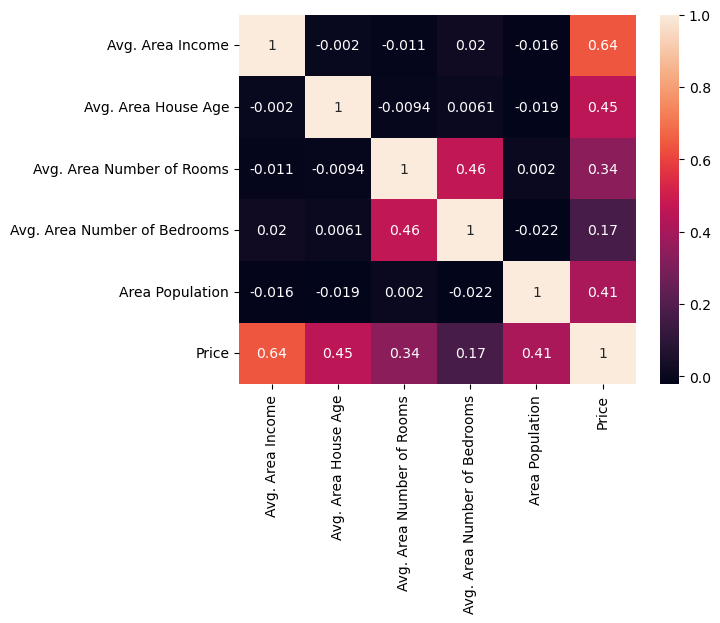

In [23]:
sns.heatmap(data.corr(), annot =True)

# II.2. Division des données

In [24]:
subset = data[['Avg. Area House Age', 'Price']]

In [25]:
X = subset.iloc[:500, :-1]
y = subset.iloc[:500, -1]
y

0      1.059034e+06
1      1.505891e+06
2      1.058988e+06
3      1.260617e+06
4      6.309435e+05
           ...     
495    1.084945e+06
496    1.365081e+06
497    1.239460e+06
498    2.056693e+06
499    1.045395e+06
Name: Price, Length: 500, dtype: float64

In [26]:
X.shape

(500, 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# II.3.Régression simple

In [28]:
modele_linear  = LinearRegression()

In [29]:
modele_linear.fit(X_train, y_train)

LinearRegression()

In [30]:
X_test

,Avg. Area House Age
241,6.891731
448,7.480941
75,5.282325
212,5.867270
481,8.057347
...,...
145,6.445852
234,7.077681
382,6.002054
141,6.774711


In [31]:
prediction = modele_linear.predict(X_test)
prediction

array([1354856.9934375 , 1442369.3693162 , 1115820.18873958,
       1202699.02728442, 1527979.86949692, 1339728.22815211,
       1332219.83542713,  956621.99568392, 1308511.35711945,
       1506433.29803925, 1566212.46494959, 1396865.48899046,
       1277754.71557069, 1190909.2595169 , 1178991.52644642,
       1324976.81596922, 1294884.45571577, 1250420.94837277,
       1103884.53775029, 1296689.20196288, 1330764.70319714,
       1089770.42826491, 1212535.64432037, 1394151.23435183,
       1428139.67837805, 1023451.50920478, 1246587.78329235,
       1316859.68647237, 1050862.47123348, 1322529.0164292 ,
       1128096.86536962, 1201213.22965569, 1086470.16838636,
       1395242.37253401,  924996.65551824, 1019270.51863541,
       1467055.61990459,  924178.99583777, 1017076.76702715,
       1336185.12790176, 1097145.21823128, 1348624.72623481,
       1143421.06954424, 1028672.20435267, 1134079.97599635,
       1136203.42723939, 1369048.42462408,  929190.16960536,
       1279216.53038728,

In [32]:
print("Mean Squared error:", mean_squared_error(y_test, prediction))
print("r2_score:",r2_score(y_test, prediction))

Mean Squared error: 109008040735.71274
r2_score: 0.2710212525346779


In [33]:
modele_linear.score(X_test, y_test)

0.2710212525346779

In [34]:
modele_linear.predict([[5.443360]])

array([1139737.88661031])

# II.5 Affichage de la ligne de regression

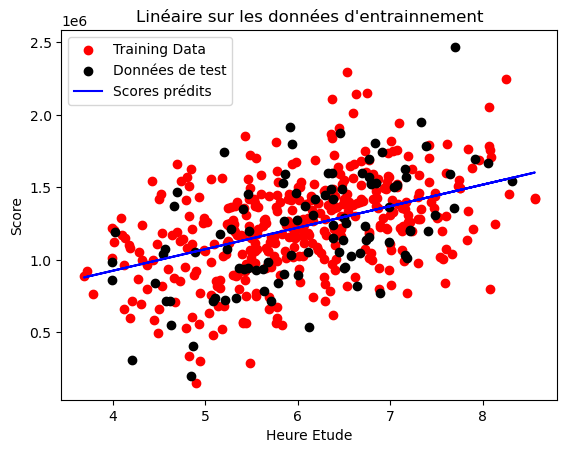

In [35]:
plt.scatter(X_train, y_train, c='r', label = "Training Data") 
plt.scatter(X_test, y_test, color ='black', label="Données de test")
plt.plot(X_train, modele_linear.predict(X_train), color='b', label ="Scores prédits")
plt.xlabel("Heure Etude")
plt.ylabel("Score")
plt.title("Linéaire sur les données d'entrainnement")
plt.legend()
plt.show()

# II.4. Regression multiple

In [36]:
data = pd.read_csv('USA_Housing.csv')

In [37]:
data.shape

(5000, 7)

In [38]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [40]:
data.drop(['Address'], axis = 1, inplace =True)
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# 4.1 Division des données

In [41]:
X = data.iloc[:500,:-1]
y = data.iloc[:500,-1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 4.2 Entrainement et évaluation du modèle

In [43]:
modele_linear_multi = LinearRegression()

In [44]:
modele_linear_multi.fit(X_train, y_train)

LinearRegression()

In [45]:
y_test

151    1.416966e+06
424    1.275319e+06
154    1.383031e+06
190    1.262018e+06
131    1.530124e+06
           ...     
50     1.417820e+06
264    1.280432e+06
34     9.363690e+05
78     1.597655e+06
223    8.195980e+05
Name: Price, Length: 100, dtype: float64

In [46]:
prediction = modele_linear_multi.predict(X_test)
prediction

array([1433798.47580965, 1166672.87723506, 1272058.47954601,
       1140244.89623714, 1528858.27444632, 1568002.37246512,
       1284104.47866031,  975843.52676045,  654442.52260465,
        764428.75940222, 1640990.85948468, 1212150.57529008,
        731559.2734568 ,  797557.87821676, 1288125.8687949 ,
       1489943.46778231, 1614100.10884873, 1079896.90023356,
       1192718.69003532, 1294413.98339797,  960120.81491449,
        405522.7385948 , 1280751.83879841,  826009.50757384,
       1139988.62579386,  977972.02534875, 1630438.55010747,
       1752735.80439555, 1460062.76972624, 1097137.23469053,
        925949.91409818, 1333388.11747206, 1724508.74470684,
        989967.9783167 , 1227424.19649829,  819016.89985376,
       1448837.50046517, 1087417.23878198, 1375149.90807974,
       1399369.08421677,  973605.69336438, 1368788.16697837,
       1148162.41176132,  773644.92140364,  903558.59721622,
       1424681.54199633, 1109219.88542755,  844449.1918695 ,
       1180619.57079484,

In [47]:
print("Mean Squared error:", mean_squared_error(y_test, prediction))
print("r2_score:",r2_score(y_test, prediction))

Mean Squared error: 11875716279.691465
r2_score: 0.8970187451148367


# III. EXERCICES N°03

# III. 1.lecture et analyse des données

In [48]:
data = pd.read_csv('Real-estate.csv')

In [49]:
data.head()

,No,X1 date de transaction,X2 age de la maison,X3 distance jusqu'a la gare la plus proche,X4 nombre de supermarket de proximite,X5 latitude,X6 longitude,Y prix de la maison par unite de surface
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
data.shape

(414, 8)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   No                                          414 non-null    int64  
 1   X1 date de transaction                      414 non-null    float64
 2   X2 age de la maison                         414 non-null    float64
 3   X3 distance jusqu'a la gare la plus proche  414 non-null    float64
 4   X4 nombre de supermarket de proximite       414 non-null    int64  
 5   X5 latitude                                 414 non-null    float64
 6   X6 longitude                                414 non-null    float64
 7   Y prix de la maison par unite de surface    414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [52]:
data.describe()

,No,X1 date de transaction,X2 age de la maison,X3 distance jusqu'a la gare la plus proche,X4 nombre de supermarket de proximite,X5 latitude,X6 longitude,Y prix de la maison par unite de surface
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# III. 2. Division des données

In [53]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# 3. Entrainement et évaluation du modèle

In [55]:
modele_linear_multi1 = LinearRegression()

In [56]:
modele_linear_multi1.fit(X_train, y_train)

LinearRegression()

In [57]:
y_test

78     29.8
31     25.0
148    45.1
273    29.3
200    25.5
       ... 
42     34.7
166    73.6
170    14.4
231    14.7
314    41.6
Name: Y prix de la maison par unite de surface, Length: 83, dtype: float64

In [58]:
prediction = modele_linear_multi1.predict(X_test)
prediction

array([33.97389466, 41.7214541 , 14.80643721, 42.36615035, 33.40258744,
       28.99981423, 38.70638888, 16.38115933, 44.25027257, 42.71295609,
       37.72570931, 43.21125296, 45.48919408, 42.50189801, 39.79528076,
       47.58523158, 43.0110396 , 44.9097467 , 46.93502065, 28.66823959,
       48.00274186, 29.64366962, 38.24199991, 48.46585091, 33.68215249,
       29.48511949, 42.823265  , 41.87837512, 42.12703259, 42.85540916,
       52.78235794, 48.18370369, 36.83040487, 34.45579034, 33.86066497,
       47.62687243, 32.30983531, 34.05183345, 35.19100801, 49.78177443,
       40.13212149, 45.11929572, 51.54883533, 45.66937114, 47.34615933,
       42.22002736, 37.13726567, 51.32980011, 47.22656436, 39.24118518,
       46.61385073, 37.23007283, 36.58714737, 44.95845975, 45.82108719,
       42.77355905, 53.45056903, 38.60490833, 41.22508586, 48.64889284,
       32.1350321 , 44.17014755, 51.05389153, 24.56183792, 53.92349001,
       47.08787507, 17.16534479, 40.5126958 , 37.89200004, 37.54

In [59]:
print("Mean Squared error:", mean_squared_error(y_test, prediction))
print("r2_score:",r2_score(y_test, prediction))

Mean Squared error: 98.1584018415209
r2_score: 0.46170827406794956
